# KNN

# MNISTÊâãÂÜôËØÜÂà´

In [2]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Ëé∑ÂèñÊï∞ÊçÆÈõÜ

In [3]:
# Ëé∑ÂèñÊï∞ÊçÆÈõÜ
>>> from sklearn.datasets import fetch_openml
>>> mnist = fetch_openml ('mnist_784', version = 1)
>>> mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

Scikit-LearnÂä†ËΩΩÁöÑÊï∞ÊçÆÈõÜÈÄöÂ∏∏ÂÖ∑ÊúâÁ±ª‰ººÁöÑÂ≠óÂÖ∏ÁªìÊûÑÔºåÂåÖÊã¨Ôºö\
¬∑DESCRÈîÆÔºåÊèèËø∞Êï∞ÊçÆÈõÜ„ÄÇ\
¬∑dataÈîÆÔºåÂåÖÂê´‰∏Ä‰∏™Êï∞ÁªÑÔºåÊØè‰∏™ÂÆû‰æã‰∏∫‰∏ÄË°åÔºåÊØè‰∏™ÁâπÂæÅ‰∏∫‰∏ÄÂàó„ÄÇ\
¬∑targetÈîÆÔºåÂåÖÂê´‰∏Ä‰∏™Â∏¶ÊúâÊ†áËÆ∞ÁöÑÊï∞ÁªÑ„ÄÇ

In [4]:
# ÊèêÂèñÁâπÂæÅ X ÂíåÊ†áÁ≠æ y
>>> X, y = mnist["data"], mnist["target"]
>>> X.shape

(70000, 784)

In [5]:
>>> y.shape

(70000,)

ÂÖ±Êúâ7‰∏áÂº†ÂõæÁâáÔºåÊØèÂº†ÂõæÁâáÊúâ784‰∏™ÁâπÂæÅ„ÄÇÂõ†‰∏∫ÂõæÁâáÊòØ28√ó28ÂÉèÁ¥†Ôºå
ÊØè‰∏™ÁâπÂæÅ‰ª£Ë°®‰∫Ü‰∏Ä‰∏™ÂÉèÁ¥†ÁÇπÁöÑÂº∫Â∫¶Ôºå‰ªé0ÔºàÁôΩËâ≤ÔºâÂà∞255ÔºàÈªëËâ≤Ôºâ„ÄÇÂÖàÊù•
ÁúãÁúãÊï∞ÊçÆÈõÜ‰∏≠ÁöÑ‰∏Ä‰∏™Êï∞Â≠óÔºå‰Ω†Âè™ÈúÄË¶ÅÈöèÊâãÊäìÂèñ‰∏Ä‰∏™ÂÆû‰æãÁöÑÁâπÂæÅÂêëÈáèÔºåÂ∞Ü
ÂÖ∂ÈáçÊñ∞ÂΩ¢Êàê‰∏Ä‰∏™28√ó28Êï∞ÁªÑÔºåÁÑ∂Âêé‰ΩøÁî®MatplotlibÁöÑimshowÔºàÔºâÂáΩÊï∞Â∞Ü
ÂÖ∂ÊòæÁ§∫Âá∫Êù•Ôºö

In [6]:
# Â∞Ü y ËΩ¨‰∏∫Êï¥Êï∞Á±ªÂûã
y = y.astype(int)

# Ê£ÄÊü•ÂâçÂá†‰∏™Ê†áÁ≠æ
print("Ââç5‰∏™Ê†áÁ≠æ:", y[:5])  # [5 0 4 1 9]

Ââç5‰∏™Ê†áÁ≠æ: 0    5
1    0
2    4
3    1
4    9
Name: class, dtype: int64


In [7]:
print(type(X))   

<class 'pandas.core.frame.DataFrame'>


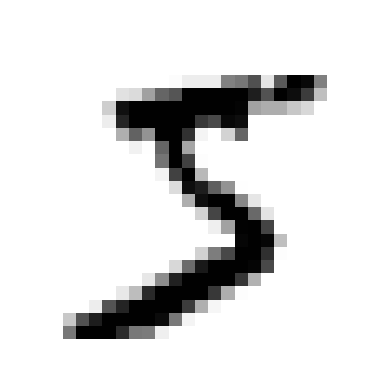

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X.iloc[0] 
some_digit_image = some_digit.values.reshape(28, 28) 
# ËøôÈáåÊú¨Êù•Â∫îËØ•ÂÜôÔºö
# some_digit = X[0]  # ‚úÖ Ê≠£Á°ÆÔºöÂèñÁ¨¨‰∏Ä‰∏™Ê†∑Êú¨
# some_digit_image = some_digit.reshape(28, 28)
# ‰ΩÜÊòØ‰ªétypeÂèØÁü• X Ë¢´ËΩ¨Êàê‰∫ÜDataFrameÔºåÊâÄ‰ª•Ë¶ÅÁî®„ÄÇilocÊù•Âèñ‰ΩçÁΩÆ
plt.imshow(some_digit_image, cmap = "binary")
plt.axis("off")
plt.show()

## ÂàíÂàÜËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜ
‰∫ãÂÆû‰∏äÔºåMNISTÊï∞ÊçÆÈõÜÂ∑≤ÁªèÂàÜÊàêËÆ≠ÁªÉÈõÜÔºàÂâç6
‰∏áÂº†ÂõæÁâáÔºâÂíåÊµãËØïÈõÜÔºàÊúÄÂêé1‰∏áÂº†ÂõæÁâáÔºâ‰∫ÜÔºö

In [9]:
# ÂàíÂàÜËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜÔºà60k ËÆ≠ÁªÉÔºå10k ÊµãËØïÔºâ
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=10000, random_state=42, stratify=y
)

print("ËÆ≠ÁªÉÈõÜÂ§ßÂ∞è:", X_train.shape[0])  # 60000
print("ÊµãËØïÈõÜÂ§ßÂ∞è:", X_test.shape[0])   # 10000

ËÆ≠ÁªÉÈõÜÂ§ßÂ∞è: 60000
ÊµãËØïÈõÜÂ§ßÂ∞è: 10000


test_size=10000: ‰øùÁïô 1 ‰∏áÂº†ÂÅöÊµãËØï\
stratify=y: ‰øùËØÅËÆ≠ÁªÉ/ÊµãËØïÈõÜ‰∏≠ÂêÑÁ±ªÂà´ÊØî‰æã‰∏ÄËá¥ÔºàÈÅøÂÖçÊüêÁ±ªÂ§™Â∞ëÔºâ

In [10]:
print("X_train shape:", X_train.shape)  # Â∫îËØ•ÊòØ (60000, 784)
print("X_test shape:", X_test.shape)    # Â∫îËØ•ÊòØ (10000, 784)
print("y_train shape:", y_train.shape)  # Â∫îËØ•ÊòØ (60000,)
print("y_test shape:", y_test.shape)    # Â∫îËØ•ÊòØ (10000,)

X_train shape: (60000, 784)
X_test shape: (10000, 784)
y_train shape: (60000,)
y_test shape: (10000,)


## Áî®sklearn ÂÆûÁé∞ KN


In [17]:
# ÂàõÂª∫ KNN ÂàÜÁ±ªÂô®ÔºåK=3
knn_clf = KNeighborsClassifier(n_neighbors=3)

# ËÆ≠ÁªÉÊ®°ÂûãÔºàÂÖ∂ÂÆûÂè™ÊòØÊääÊï∞ÊçÆÂ≠òËµ∑Êù•Ôºâ
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## È¢ÑÊµãÊµãËØïÈõÜ

In [12]:
# È¢ÑÊµãÊµãËØïÈõÜÊ†áÁ≠æ
y_pred = knn_clf.predict(X_test)

## ËÆ°ÁÆóÂáÜÁ°ÆÂ∫¶

In [13]:
acc = accuracy_score(y_test, y_pred)
print(f"ÂáÜÁ°ÆÁéá: {acc:.4f}")  # Â§ßÁ∫¶ 0.9688 ‚Üí 96.88%

ÂáÜÁ°ÆÁéá: 0.9735


In [14]:
# Êü•ÁúãËØ¶ÁªÜÊä•Âëä
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       986
           1       0.97      1.00      0.98      1125
           2       0.99      0.97      0.98       999
           3       0.97      0.97      0.97      1020
           4       0.98      0.96      0.97       975
           5       0.96      0.97      0.97       902
           6       0.98      0.99      0.98       982
           7       0.97      0.98      0.97      1042
           8       0.99      0.94      0.97       975
           9       0.95      0.96      0.96       994

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



Ëß£ËØªÔºö 

precision: È¢ÑÊµã‰∏∫ÊüêÁ±ªÁöÑÊ†∑Êú¨‰∏≠ÔºåÊúâÂ§öÂ∞ëÊòØÁúüÁöÑ

recall: ÂÆûÈôÖÊòØÊüêÁ±ªÁöÑÊ†∑Êú¨‰∏≠ÔºåÊúâÂ§öÂ∞ëË¢´Ê≠£Á°ÆÈ¢ÑÊµã

f1-score: Á≤æÁ°ÆÁéáÂíåÂè¨ÂõûÁéáÁöÑË∞ÉÂíåÂπ≥Âùá

###  Ê∑∑Ê∑ÜÁü©ÈòµÔºàConfusion MatrixÔºâ

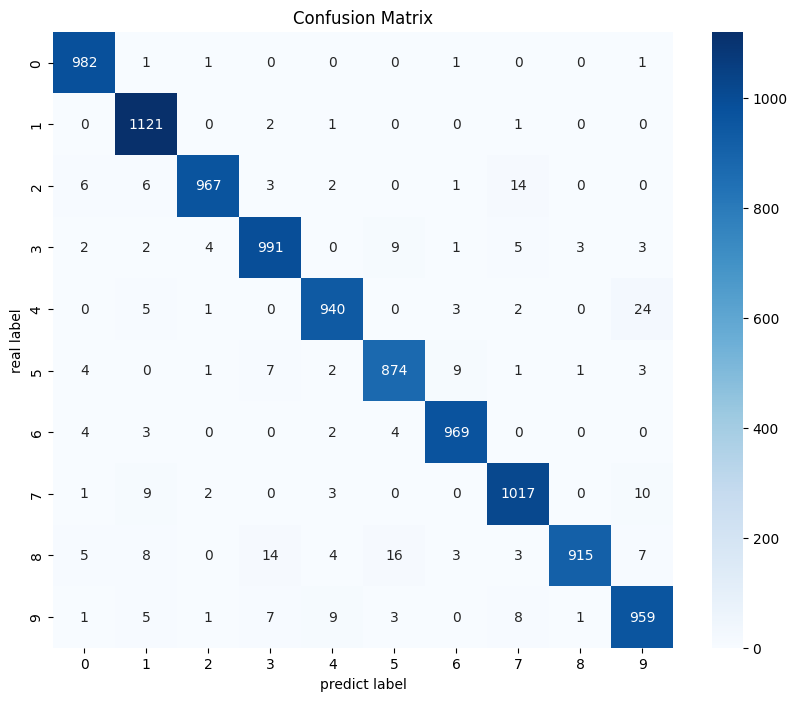

In [15]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("predict label")
plt.ylabel("real label")
plt.show()

Ëß£ÈáäËøôÂº†ÂõæÔºö

 1. ÂØπËßíÁ∫ø‰∏äÁöÑÊï∞Â≠ó ‚Üí Ê≠£Á°ÆÈ¢ÑÊµãÁöÑÊï∞Èáè

Á¨¨ 3 Ë°åÁ¨¨ 3 ÂàóÁöÑ 991ÔºöË°®Á§∫ÁúüÂÆûÊòØ‚Äú3‚ÄùÁöÑÂõæÁâáÔºåÊúâ 991 Âº†Ë¢´Ê≠£Á°ÆÈ¢ÑÊµã‰∏∫‚Äú3‚Äù

Á¨¨ 4 Ë°åÁ¨¨ 5 ÂàóÁöÑ 24ÔºöË°®Á§∫ÁúüÂÆûÊòØ‚Äú4‚ÄùÁöÑÂõæÁâáÔºåÊúâ 24 Âº†Ë¢´ÈîôËØØÈ¢ÑÊµã‰∏∫‚Äú5‚Äù


2. ÈùûÂØπËßíÁ∫ø‰∏äÁöÑÊï∞Â≠ó ‚Üí ÈîôËØØÈ¢ÑÊµãÁöÑÊï∞Èáè

Á¨¨4Ë°åÁ¨¨9Âàó = 24Ôºö Êúâ 24 Âº†ÁúüÂÆûÊòØ‚Äú4‚ÄùÁöÑÂõæÁâáÔºåË¢´Ê®°ÂûãÈîôÂà§‰∏∫‚Äú9‚Äù


## Ë∞ÉÂèÇ-Â¶Ç‰ΩïÈÄâÊã©ÊúÄ‰Ω≥kÂÄº

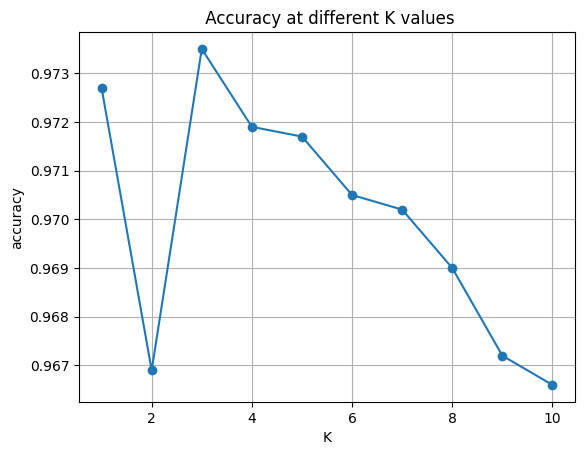

Best K values: 3


In [18]:
# Â∞ùËØï‰∏çÂêåÁöÑ K ÂÄºÔºåÊâæÂá∫ÊúÄ‰ºò
k_range = range(1,11)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

# ÁîªÂõæ
plt.plot(k_range, scores, marker='o')
plt.title(" Accuracy at different K values")
plt.xlabel("K")
plt.ylabel("accuracy")
plt.grid(True)
plt.show()

# ÊúÄ‰Ω≥ K
best_k = k_range[np.argmax(scores)]
print(f"Best K values: {best_k}")

üìà ÈÄöÂ∏∏ K=3~7 Ë°®Áé∞ÊúÄÂ•Ω„ÄÇÂ§™Â∞èÔºàK=1ÔºâÂÆπÊòìÂèóÂô™Â£∞ÂΩ±ÂìçÔºõÂ§™Â§ßÂàôËøá‰∫éÂπ≥Êªë„ÄÇ 

## neigbors = 1
k-NN ÁÆóÊ≥ïÊúÄÁÆÄÂçïÁöÑÁâàÊú¨Âè™ËÄÉËôë‰∏Ä‰∏™ÊúÄËøëÈÇªÔºå‰πüÂ∞±ÊòØ‰∏éÊàë‰ª¨ÊÉ≥Ë¶ÅÈ¢ÑÊµãÁöÑÊï∞ÊçÆÁÇπÊúÄËøëÁöÑËÆ≠ÁªÉ
Êï∞ÊçÆÁÇπ„ÄÇÈ¢ÑÊµãÁªìÊûúÂ∞±ÊòØËøô‰∏™ËÆ≠ÁªÉÊï∞ÊçÆÁÇπÁöÑÂ∑≤Áü•ËæìÂá∫„ÄÇ

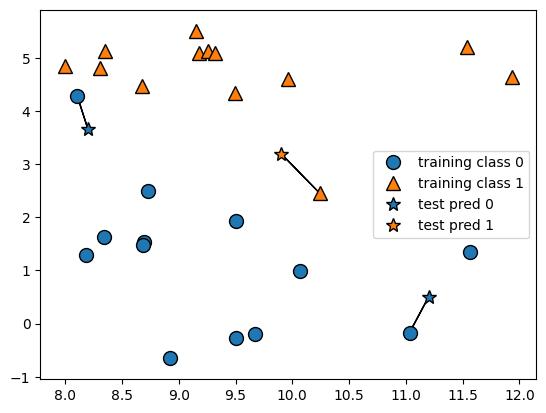

In [6]:
 mglearn.plots.plot_knn_classification(n_neighbors=1)

## neigbors = 3
Âú®ËÄÉËôëÂ§ö‰∫é‰∏Ä‰∏™ÈÇªÂ±ÖÁöÑÊÉÖÂÜµÊó∂ÔºåÊàë‰ª¨Áî®‚ÄúÊäïÁ•®Ê≥ï‚ÄùÔºàvotingÔºâÊù•ÊåáÂÆöÊ†áÁ≠æ„ÄÇ‰πüÂ∞±ÊòØËØ¥ÔºåÂØπ
‰∫éÊØè‰∏™ÊµãËØïÁÇπÔºåÊàë‰ª¨Êï∞‰∏ÄÊï∞Â§öÂ∞ë‰∏™ÈÇªÂ±ÖÂ±û‰∫éÁ±ªÂà´0ÔºåÂ§öÂ∞ë‰∏™ÈÇªÂ±ÖÂ±û‰∫éÁ±ªÂà´1„ÄÇÁÑ∂ÂêéÂ∞ÜÂá∫Áé∞
Ê¨°Êï∞Êõ¥Â§öÁöÑÁ±ªÂà´Ôºà‰πüÂ∞±ÊòØk‰∏™ËøëÈÇª‰∏≠Âç†Â§öÊï∞ÁöÑÁ±ªÂà´Ôºâ‰Ωú‰∏∫È¢ÑÊµãÁªìÊûú„ÄÇ

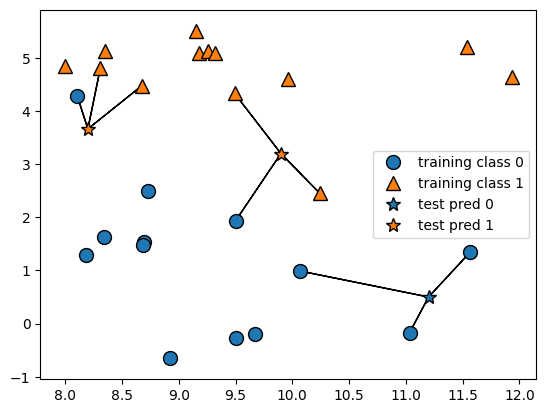

In [7]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

# Â¶Ç‰ΩïÈÄöËøáscikit-learnÊù•Â∫îÁî®kËøëÈÇªÁÆóÊ≥ï
## ÂàíÂàÜËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜ

In [8]:
from sklearn.model_selection import train_test_split 
X, y = mglearn.datasets.make_forge() 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## ÂØºÂÖ•Á±ªÂπ∂Â∞ÜÂÖ∂ÂÆû‰æãÂåñ
ËøôÊó∂ÂèØ‰ª•ËÆæÂÆöÂèÇÊï∞ÔºåÊØîÂ¶ÇÈÇªÂ±ÖÁöÑ‰∏™Êï∞„ÄÇËøôÈáåÊàë‰ª¨Â∞ÜÂÖ∂ËÆæ‰∏∫3Ôºö

In [9]:
from sklearn.neighbors import KNeighborsClassifier 
clf = KNeighborsClassifier(n_neighbors=3)

## ÊãüÂêà
Áé∞Âú®ÔºåÂà©Áî®ËÆ≠ÁªÉÈõÜÂØπËøô‰∏™ÂàÜÁ±ªÂô®ËøõË°åÊãüÂêà„ÄÇÂØπ‰∫éKNeighborsClassifierÊù•ËØ¥Â∞±ÊòØ‰øùÂ≠òÊï∞ÊçÆ
ÈõÜÔºå‰ª•‰æøÂú®È¢ÑÊµãÊó∂ËÆ°ÁÆó‰∏éÈÇªÂ±Ö‰πãÈó¥ÁöÑË∑ùÁ¶ªÔºö

In [10]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## È¢ÑÊµã
Ë∞ÉÁî®predict ÊñπÊ≥ïÊù•ÂØπÊµãËØïÊï∞ÊçÆËøõË°åÈ¢ÑÊµã„ÄÇÂØπ‰∫éÊµãËØïÈõÜ‰∏≠ÁöÑÊØè‰∏™Êï∞ÊçÆÁÇπÔºåÈÉΩË¶ÅËÆ°ÁÆóÂÆÉÂú®ËÆ≠
ÁªÉÈõÜÁöÑÊúÄËøëÈÇªÔºåÁÑ∂ÂêéÊâæÂá∫ÂÖ∂‰∏≠Âá∫Áé∞Ê¨°Êï∞ÊúÄÂ§öÁöÑÁ±ªÂà´

In [11]:
print("Test set predictions: {}".format(clf.predict(X_test)))

Test set predictions: [1 0 1 0 1 0 0]


## ËØÑ‰º∞Ê®°ÂûãÊ≥õÂåñËÉΩÂäõ

In [13]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


ÂèØ‰ª•ÁúãÂà∞ÔºåÊàë‰ª¨ÁöÑÊ®°ÂûãÁ≤æÂ∫¶Á∫¶‰∏∫86%Ôºå‰πüÂ∞±ÊòØËØ¥ÔºåÂú®ÊµãËØïÊï∞ÊçÆÈõÜ‰∏≠ÔºåÊ®°ÂûãÂØπÂÖ∂‰∏≠86%ÁöÑ
Ê†∑Êú¨È¢ÑÊµãÁöÑÁ±ªÂà´ÈÉΩÊòØÊ≠£Á°ÆÁöÑ„ÄÇ

# ÂàÜÊûêKNeighborsClassifier

## ÂÜ≥Á≠ñËæπÁïåÔºàdecision boundaryÔºâ
‰∏ãÂàó‰ª£Á†ÅÂàÜÂà´Â∞Ü1‰∏™„ÄÅ3‰∏™Âíå9‰∏™ÈÇªÂ±Ö‰∏âÁßçÊÉÖÂÜµÁöÑÂÜ≥Á≠ñËæπÁïåÂèØËßÜÂåñ

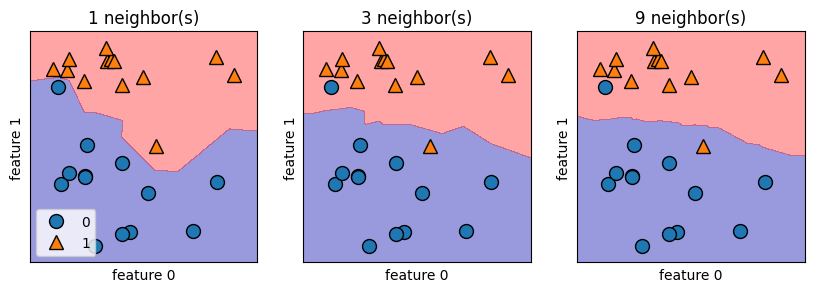

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3)) 
for n_neighbors, ax in zip([1, 3, 9], axes): 
    # fitÊñπÊ≥ïËøîÂõûÂØπË±°Êú¨Ë∫´ÔºåÊâÄ‰ª•Êàë‰ª¨ÂèØ‰ª•Â∞ÜÂÆû‰æãÂåñÂíåÊãüÂêàÊîæÂú®‰∏ÄË°å‰ª£Á†Å‰∏≠ 
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y) 
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4) 
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax) 
    ax.set_title("{} neighbor(s)".format(n_neighbors)) 
    ax.set_xlabel("feature 0") 
    ax.set_ylabel("feature 1") 
axes[0].legend(loc=3)

‰ªéÂ∑¶ÂõæÂèØ‰ª•ÁúãÂá∫Ôºå‰ΩøÁî®Âçï‰∏ÄÈÇªÂ±ÖÁªòÂà∂ÁöÑÂÜ≥Á≠ñËæπÁïåÁ¥ßË∑üÁùÄËÆ≠ÁªÉÊï∞ÊçÆ„ÄÇÈöèÁùÄÈÇªÂ±Ö‰∏™Êï∞Ë∂äÊù•Ë∂ä
Â§öÔºåÂÜ≥Á≠ñËæπÁïå‰πüË∂äÊù•Ë∂äÂπ≥Êªë„ÄÇÊõ¥Âπ≥ÊªëÁöÑËæπÁïåÂØπÂ∫îÊõ¥ÁÆÄÂçïÁöÑÊ®°Âûã„ÄÇ

Êç¢Âè•ËØùËØ¥Ôºå‰ΩøÁî®Êõ¥Â∞ëÁöÑÈÇª
Â±ÖÂØπÂ∫îÊõ¥È´òÁöÑÊ®°ÂûãÂ§çÊùÇÂ∫¶ÔºàÂ¶ÇÂõæ2-1Âè≥‰æßÊâÄÁ§∫ÔºâÔºåËÄå‰ΩøÁî®Êõ¥Â§öÁöÑÈÇªÂ±ÖÂØπÂ∫îÊõ¥‰ΩéÁöÑÊ®°ÂûãÂ§çÊùÇÂ∫¶
ÔºàÂ¶ÇÂõæ2-1Â∑¶‰æßÊâÄÁ§∫Ôºâ

ÂÅáÂ¶ÇËÄÉËôëÊûÅÁ´ØÊÉÖÂÜµÔºåÂç≥ÈÇªÂ±Ö‰∏™Êï∞Á≠â‰∫éËÆ≠ÁªÉÈõÜ‰∏≠ÊâÄÊúâÊï∞ÊçÆÁÇπÁöÑ‰∏™Êï∞Ôºå
ÈÇ£‰πàÊØè‰∏™ÊµãËØïÁÇπÁöÑÈÇªÂ±ÖÈÉΩÂÆåÂÖ®Áõ∏ÂêåÔºàÂç≥ÊâÄÊúâËÆ≠ÁªÉÁÇπÔºâÔºåÊâÄÊúâÈ¢ÑÊµãÁªìÊûú‰πüÂÆåÂÖ®Áõ∏ÂêåÔºàÂç≥ËÆ≠ÁªÉ
ÈõÜ‰∏≠Âá∫Áé∞Ê¨°Êï∞ÊúÄÂ§öÁöÑÁ±ªÂà´Ôºâ„ÄÇ

# k ËøëÈÇªÂõûÂΩí
k ËøëÈÇªÁÆóÊ≥ïËøòÂèØ‰ª•Áî®‰∫éÂõûÂΩí„ÄÇÊàë‰ª¨ËøòÊòØÂÖà‰ªéÂçï‰∏ÄËøëÈÇªÂºÄÂßãÔºåËøôÊ¨°‰ΩøÁî®waveÊï∞ÊçÆÈõÜ„ÄÇÊàë‰ª¨Ê∑ª
Âä†‰∫Ü3‰∏™ÊµãËØïÊï∞ÊçÆÁÇπÔºåÂú®xËΩ¥‰∏äÁî®ÁªøËâ≤‰∫îËßíÊòüË°®Á§∫„ÄÇÂà©Áî®Âçï‰∏ÄÈÇªÂ±ÖÁöÑÈ¢ÑÊµãÁªìÊûúÂ∞±ÊòØÊúÄËøëÈÇª
ÁöÑÁõÆÊ†áÂÄº„ÄÇ

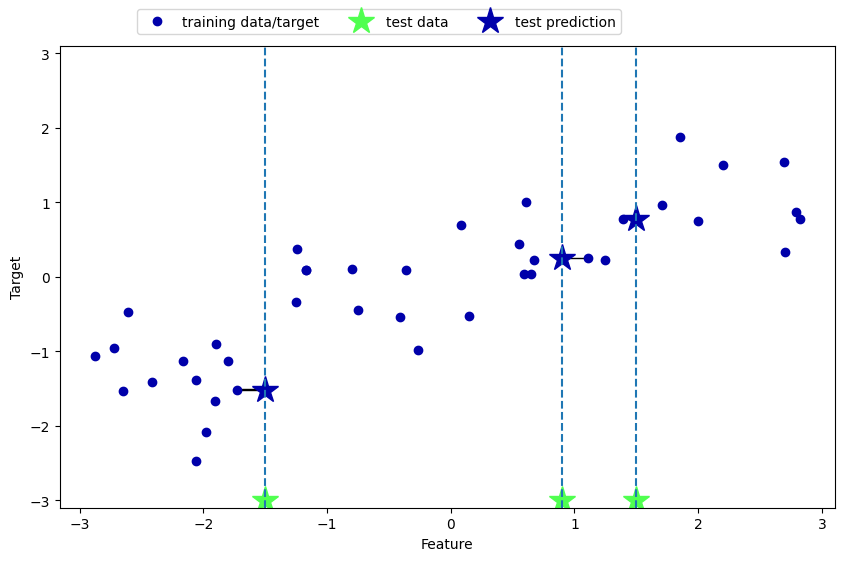

In [19]:
mglearn.plots.plot_knn_regression(n_neighbors = 1)

ÂêåÊ†∑Ôºå‰πüÂèØ‰ª•Áî®Â§ö‰∏™ËøëÈÇªËøõË°åÂõûÂΩí„ÄÇ

**Âú®‰ΩøÁî®Â§ö‰∏™ËøëÈÇªÊó∂ÔºåÈ¢ÑÊµãÁªìÊûú‰∏∫Ëøô‰∫õÈÇªÂ±ÖÁöÑÂπ≥ÂùáÂÄº**

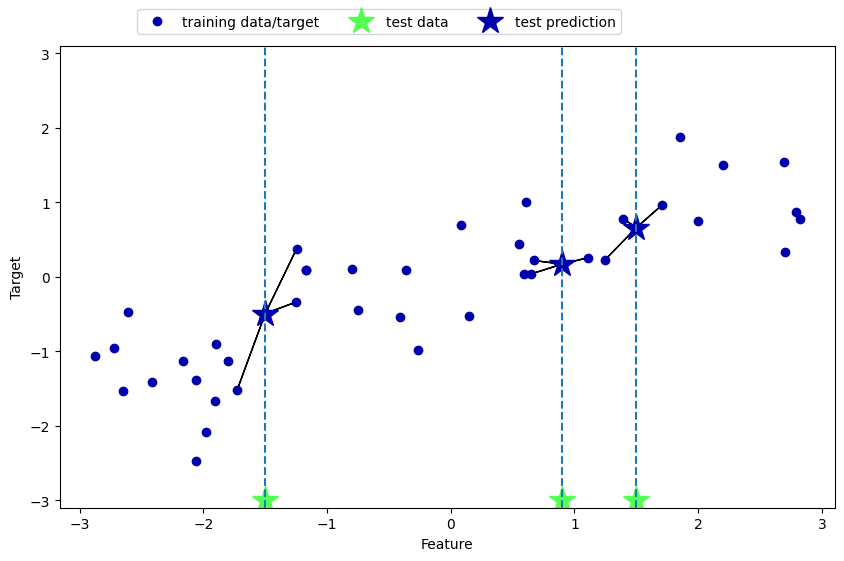

In [20]:
mglearn.plots.plot_knn_regression(n_neighbors = 3)

## ÂàíÂàÜÊï∞ÊçÆÈõÜÂíåÂÆû‰æãÂåñ
Áî®‰∫éÂõûÂΩíÁöÑkËøëÈÇªÁÆóÊ≥ïÂú®scikit-learnÁöÑKNeighborsRegressor Á±ª‰∏≠ÂÆûÁé∞„ÄÇÂÖ∂Áî®Ê≥ï‰∏é
KNeighborsClassifier Á±ª‰ººÔºö

In [23]:
from sklearn.neighbors import KNeighborsRegressor

X,y = mglearn.datasets.make_wave(n_samples = 40)

# ÂàíÂàÜÊï∞ÊçÆÈõÜ
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# ÂÆû‰æãÂåñ
reg = KNeighborsRegressor(n_neighbors = 3)

# ÊãüÂêà
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

## È¢ÑÊµã

In [29]:
print("Test set predictions:\n{}".format(reg.predict(X_test)))

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [31]:
formatted_predictions = ["{:.2f}".format(x) for x in reg.predict(X_test)]
print("Test set predictions:\n{}".format(formatted_predictions))

Test set predictions:
['-0.05', '0.36', '1.14', '-1.89', '-1.14', '-1.63', '0.36', '0.91', '-0.45', '-1.14']


Êàë‰ª¨ËøòÂèØ‰ª•Áî®scoreÊñπÊ≥ïÊù•ËØÑ‰º∞Ê®°ÂûãÔºåÂØπ‰∫éÂõûÂΩíÈóÆÈ¢òÔºåËøô‰∏ÄÊñπÊ≥ïËøîÂõûÁöÑÊòØR2ÂàÜÊï∞„ÄÇ

R2ÂàÜ
Êï∞‰πüÂè´‰ΩúÂÜ≥ÂÆöÁ≥ªÊï∞ÔºåÊòØÂõûÂΩíÊ®°ÂûãÈ¢ÑÊµãÁöÑ‰ºòÂ∫¶Â∫¶ÈáèÔºå‰Ωç‰∫é0Âà∞1‰πãÈó¥„ÄÇR2Á≠â‰∫é1ÂØπÂ∫îÂÆåÁæéÈ¢Ñ
ÊµãÔºåR2Á≠â‰∫é0ÂØπÂ∫îÂ∏∏Êï∞Ê®°ÂûãÔºåÂç≥ÊÄªÊòØÈ¢ÑÊµãËÆ≠ÁªÉÈõÜÂìçÂ∫îÔºày_trainÔºâÁöÑÂπ≥ÂùáÂÄº

In [32]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


# ÂàÜÊûêKNeighborsRegressor
ÂØπ‰∫éÊàë‰ª¨ÁöÑ‰∏ÄÁª¥Êï∞ÊçÆÈõÜÔºåÂèØ‰ª•Êü•ÁúãÊâÄÊúâÁâπÂæÅÂèñÂÄºÂØπÂ∫îÁöÑÈ¢ÑÊµãÁªìÊûúÔºàÂõæ2-10Ôºâ„ÄÇ‰∏∫‰∫Ü‰æø‰∫éÁªò
ÂõæÔºåÊàë‰ª¨ÂàõÂª∫‰∏Ä‰∏™Áî±ËÆ∏Â§öÁÇπÁªÑÊàêÁöÑÊµãËØïÊï∞ÊçÆÈõÜÔºö

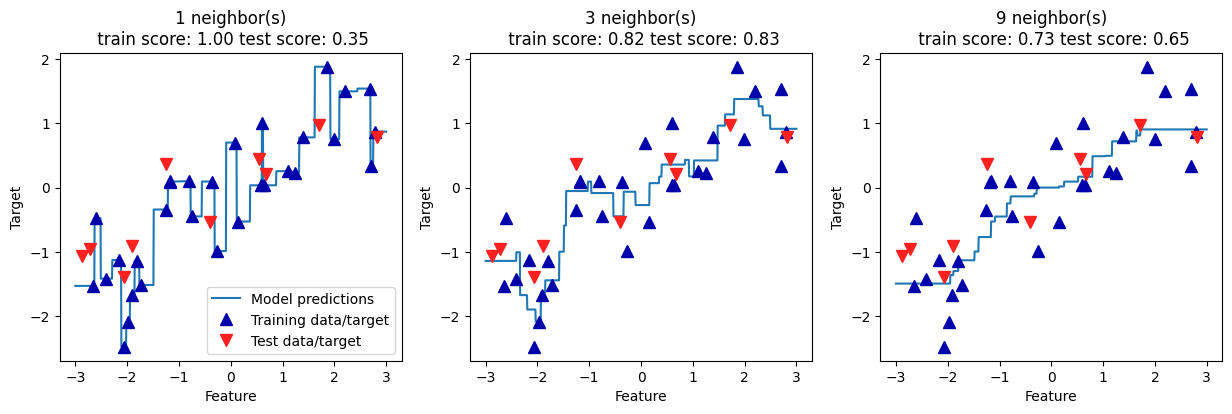

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4)) 
# ÂàõÂª∫1000‰∏™Êï∞ÊçÆÁÇπÔºåÂú®-3Âíå3‰πãÈó¥ÂùáÂåÄÂàÜÂ∏É 
line = np.linspace(-3, 3, 1000).reshape(-1, 1) 
for n_neighbors, ax in zip([1, 3, 9], axes): 
    # Âà©Áî®1‰∏™„ÄÅ3‰∏™Êàñ9‰∏™ÈÇªÂ±ÖÂàÜÂà´ËøõË°åÈ¢ÑÊµã 
    reg = KNeighborsRegressor(n_neighbors=n_neighbors) 
    reg.fit(X_train, y_train) 
    ax.plot(line, reg.predict(line)) 
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8) 
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8) 
    ax.set_title( 
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format( 
            n_neighbors, reg.score(X_train, y_train), 
            reg.score(X_test, y_test))) 
    ax.set_xlabel("Feature") 
    ax.set_ylabel("Target") 
axes[0].legend(["Model predictions", "Training data/target", 
                "Test data/target"], loc="best")

‰ªéÂõæ‰∏≠ÂèØ‰ª•ÁúãÂá∫Ôºå‰ªÖ‰ΩøÁî®Âçï‰∏ÄÈÇªÂ±ÖÔºåËÆ≠ÁªÉÈõÜ‰∏≠ÁöÑÊØè‰∏™ÁÇπÈÉΩÂØπÈ¢ÑÊµãÁªìÊûúÊúâÊòæËëóÂΩ±ÂìçÔºåÈ¢ÑÊµãÁªì
ÊûúÁöÑÂõæÂÉèÁªèËøáÊâÄÊúâÊï∞ÊçÆÁÇπ„ÄÇËøôÂØºËá¥È¢ÑÊµãÁªìÊûúÈùûÂ∏∏‰∏çÁ®≥ÂÆö„ÄÇËÄÉËôëÊõ¥Â§öÁöÑÈÇªÂ±Ö‰πãÂêéÔºåÈ¢ÑÊµãÁªìÊûú
ÂèòÂæóÊõ¥Âä†Âπ≥ÊªëÔºå‰ΩÜÂØπËÆ≠ÁªÉÊï∞ÊçÆÁöÑÊãüÂêà‰πü‰∏çÂ•Ω„ÄÇ